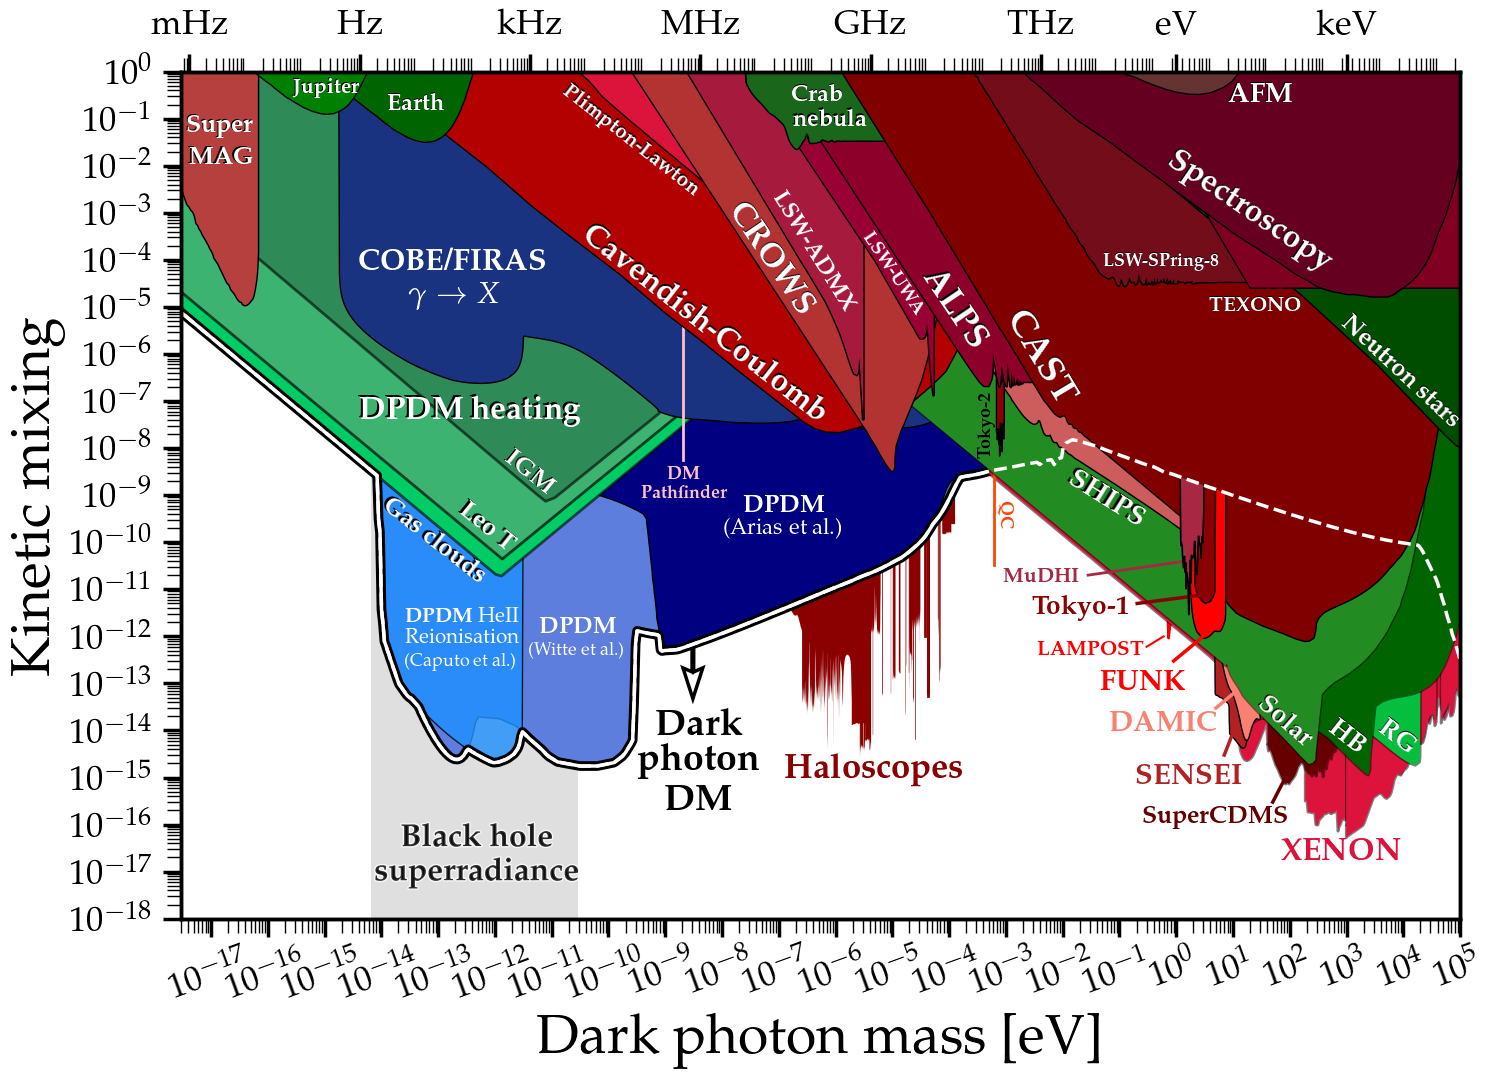

In [1]:
from PlotFuncs import *
%matplotlib inline

    
fig,ax = DarkPhoton.FigSetup()

# DPDM
DarkPhoton.DarkMatter(ax)

# Axion haloscopes
DarkPhoton.Haloscopes(ax,text_on=False,col='darkred')

# # LSW/Helioscopes
DarkPhoton.LSW(ax)
DarkPhoton.CAST(ax)
DarkPhoton.SHIPS(ax)

# Tests of coulomb law
DarkPhoton.Coulomb(ax)

# # Reactor neutrinos
DarkPhoton.TEXONO(ax)

# # Geomagnetic field
DarkPhoton.SuperMAG(ax)

# # DPDM searches
DarkPhoton.Xenon(ax)
DarkPhoton.DAMIC(ax)
DarkPhoton.SENSEI(ax)
DarkPhoton.SuperCDMS(ax)
DarkPhoton.FUNK(ax)
DarkPhoton.LAMPOST(ax)
DarkPhoton.Tokyo(ax)
DarkPhoton.SHUKET(ax,text_on=False,col='darkred')
DarkPhoton.DarkEfield(ax,text_on=False,col='darkred')
DarkPhoton.WISPDMX(ax,text_on=False,col='darkred')
DarkPhoton.SQuAD(ax,text_on=False,col='darkred')
DarkPhoton.DMPathfinder(ax)
DarkPhoton.ORPHEUS(ax,text_on=False,col='darkred')
DarkPhoton.MuDHI(ax)
DarkPhoton.DOSUE(ax,text_on=False,col='darkred')
DarkPhoton.FAST(ax,text_on=False,col='darkred')
DarkPhoton.QUALIPHIDE(ax,text_on=False,col='darkred')
DarkPhoton.QuantumCyclotron(ax)

# # Astrophysical boundse
DarkPhoton.StellarBounds(ax)
DarkPhoton.COBEFIRAS(ax)
DarkPhoton.Jupiter(ax)
DarkPhoton.Earth(ax)
DarkPhoton.Crab(ax)
DarkPhoton.IGM(ax)
DarkPhoton.LeoT(ax)
DarkPhoton.GasClouds(ax)
DarkPhoton.NeutronStarCooling(ax)


# BHSR
plt.fill_between([6.5e-15,2.9e-11],[1e-18,1e-18],y2=1,color='gray',edgecolor='none',zorder=-100,alpha=0.25)
plt.gcf().text(0.304,0.176,r'{\bf Black hole}',fontsize=23,ha='center',rotation=0,color='k',alpha=0.8,path_effects=line_background(2,'w'))
plt.gcf().text(0.304,0.145,r'{\bf superradiance}',fontsize=23,ha='center',rotation=0,color='k',alpha=0.8,path_effects=line_background(2,'w'))

# Final label
plt.arrow(0.435, 0.375, 0, -0.065, transform=fig.transFigure,figure=fig,
  length_includes_head=True,lw=2.5,
  head_width=0.012, head_length=0.028, overhang=0.13,
  edgecolor='k',facecolor='w',clip_on=False,zorder=-1)

plt.text(4e-9,0.8e-14,r'{\bf Dark}',fontsize=27,ha='center')
plt.text(4e-9,0.15e-14,r'{\bf photon}',fontsize=27,ha='center')
plt.text(4e-9,0.02e-14,r'{\bf DM}',fontsize=27,ha='center')

plt.text(5e-6,1e-15,r'{\bf Haloscopes}',color='darkred',fontsize=25,ha='center')

MySaveFig(fig,'DarkPhoton')

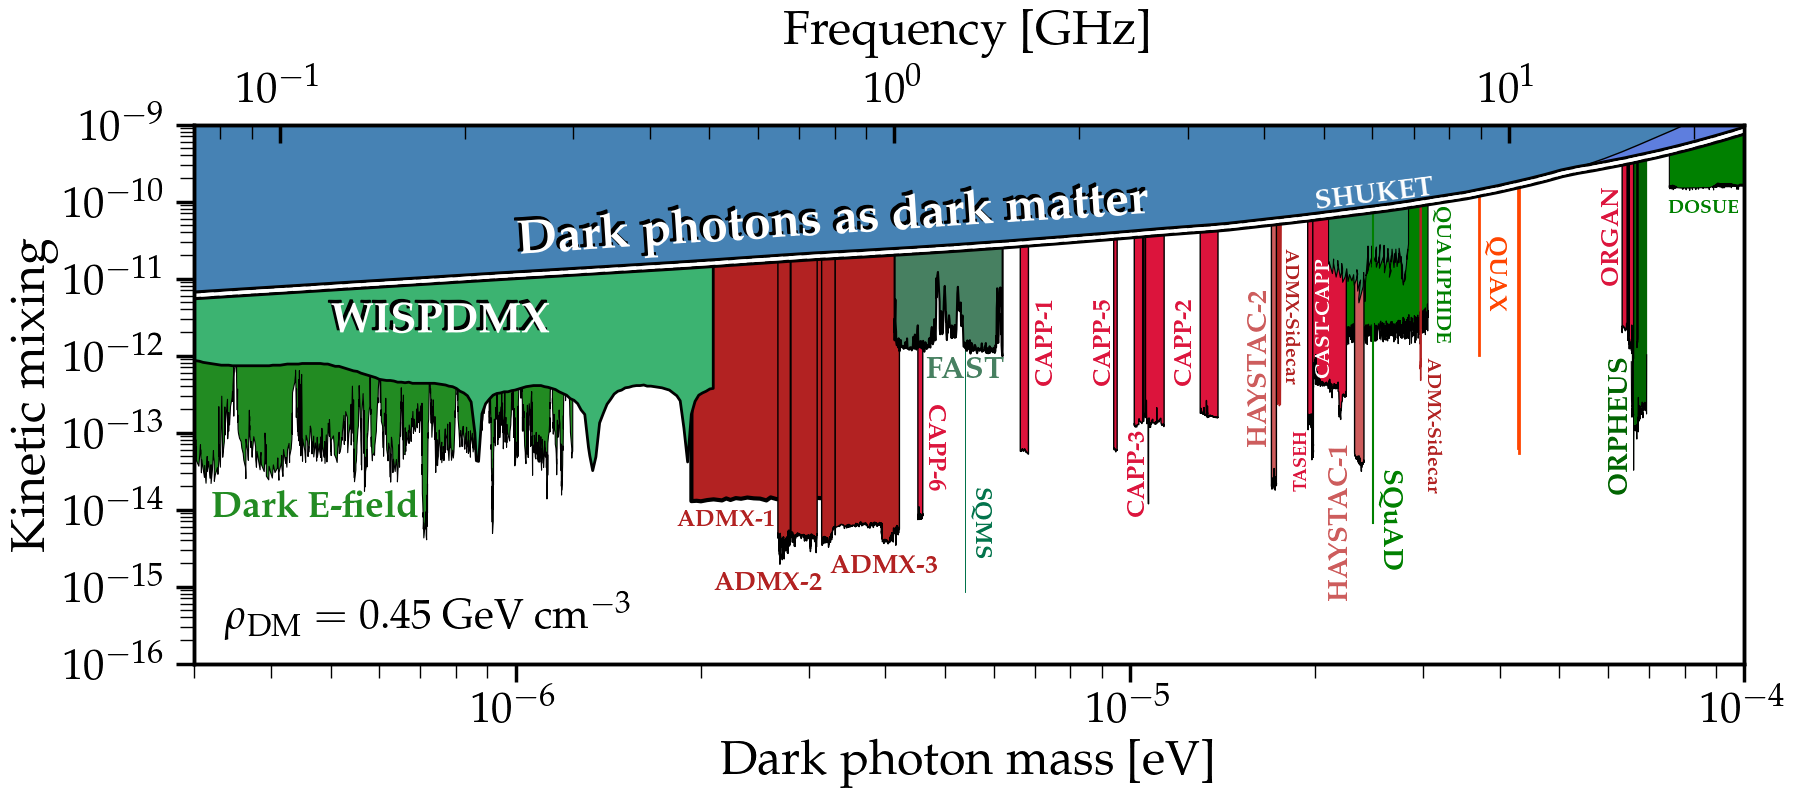

In [2]:
m_min = 3e-7
m_max = 1e-4


HAYSTAC_col = 'indianred'
CAPP_col = 'crimson'
QUAX_col = 'orangered'
ADMX_col = 'firebrick'
FAST_col = '#478061'
QUALIPHIDE_col = 'green'

fig,ax = DarkPhoton.FigSetup(m_min=m_min,m_max=m_max,chi_min=1e-16,chi_max=1e-9,\
                  FrequencyLabels=False,FrequencyAxis=True,upper_tickdir='in',\
                  Shape='Custom',width=20,height=7,f_rescale=1e9,tfs=31,lfs=35)
plt.title(r'Frequency [GHz]',ha='center',fontsize=35,pad=20)


DarkPhoton.DarkMatter(ax,text_on=False,Arias_col='steelblue')
DarkPhoton.StellarBounds(ax,text_on=False)



DarkPhoton.Tokyo(ax,text_on=False,col='darkgreen')
DarkPhoton.SHUKET(ax,text_on=False,edge_on=True,col='seagreen')
DarkPhoton.DarkEfield(ax,text_on=False,edge_on=True,col='ForestGreen')
DarkPhoton.WISPDMX(ax,text_on=False,edge_on=True,col='mediumseagreen',lw=2)
DarkPhoton.SQuAD(ax,text_on=False,col=[0,0.5,0],point_on=False,lw=1.5)
DarkPhoton.ORPHEUS(ax,text_on=False,col='darkgreen',edge_on=True)
DarkPhoton.DOSUE(ax,text_on=False,col='green',edge_on=True)
DarkPhoton.FAST(ax,text_on=False,col=FAST_col,edge_on=True)
DarkPhoton.SQMS(ax,text_on=True)
DarkPhoton.QUALIPHIDE(ax,text_on=False,col=QUALIPHIDE_col,edge_on=True)

y2 = ax.get_ylim()[1]




# ADMX
dat = loadtxt("limit_data/DarkPhoton/Rescaled/ADMX.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1,lw=3)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/ADMX2018.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/ADMX2019_1.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/ADMX2019_2.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/ADMX2021.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/ADMX_Sidecar.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=ADMX_col,facecolor=ADMX_col,zorder=0.1)

# HAYSTAC
dat = loadtxt("limit_data/DarkPhoton/Rescaled/HAYSTAC.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=HAYSTAC_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/HAYSTAC_2020.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=HAYSTAC_col,zorder=0.1)


# CAPP
dat = loadtxt("limit_data/DarkPhoton/Rescaled/CAPP-1.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/CAPP-2.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/CAPP-3.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/CAPP-4.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/CAPP-5.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/CAPP-6.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)
dat = loadtxt("limit_data/DarkPhoton/Rescaled/CAST-CAPP.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)

dat = loadtxt("limit_data/DarkPhoton/Rescaled/TASEH.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)

dat = loadtxt("limit_data/DarkPhoton/Rescaled/ORGAN-1a.txt")
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.21)


dat = loadtxt("limit_data/DarkPhoton/Rescaled/QUAX.txt")
dat[0,1] = 1e0
plt.plot(dat[:,0],dat[:,1],zorder=0.2,color=QUAX_col,lw=2)

dat = loadtxt("limit_data/DarkPhoton/Rescaled/QUAX2.txt")
dat[0,1] = 1e0
plt.plot(dat[:,0],dat[:,1],zorder=0.2,color=QUAX_col,lw=2)

dat = loadtxt("limit_data/DarkPhoton/Rescaled/QUAX3.txt")
dat[0,1] = 1e0
plt.plot(dat[:,0],dat[:,1],zorder=0.2,color=QUAX_col,lw=2)

# text labels

import matplotlib.patheffects as pe
shadow = [pe.PathPatchEffect(offset=(-2, 2), facecolor='k'),
          pe.PathPatchEffect(edgecolor='k', linewidth=0.0, facecolor='w')]

plt.text(1e-6,2.1e-11,r'{\bf Dark photons as dark matter}',color='w',fontsize=35,rotation=3.7,path_effects=shadow)
plt.text(5e-7,2e-12,r'{\bf WISPDMX}',color='w',path_effects=shadow)
plt.text(3.2e-7,0.8e-14,r'{\bf Dark E-field}',color='ForestGreen',fontsize=27)
plt.text(1.83e-6,0.6e-14,r'{\bf ADMX-1}',color=ADMX_col,fontsize=17)
plt.text(2.1e-6,0.9e-15,r'{\bf ADMX-2}',color=ADMX_col,fontsize=19)
plt.text(3.25e-6,1.5e-15,r'{\bf ADMX-3}',color=ADMX_col,fontsize=19)
plt.text(1.75e-5,0.5e-12,r'{\bf ADMX-Sidecar}',color=ADMX_col,fontsize=14,rotation=-90)
plt.text(2.99e-5,1.9e-14,r'{\bf ADMX-Sidecar}',color=ADMX_col,fontsize=14,rotation=-90)
plt.text(7e-6,0.5e-12,r'{\bf CAPP-1}',color=CAPP_col,fontsize=18,rotation=90)
plt.text(1.18e-5,0.5e-12,r'{\bf CAPP-2}',color=CAPP_col,fontsize=18,rotation=90)
plt.text(0.99e-5,0.01e-12,r'{\bf CAPP-3}',color=CAPP_col,fontsize=18,rotation=90)
plt.text(8.7e-6,0.5e-12,r'{\bf CAPP-5}',color=CAPP_col,fontsize=18,rotation=90)
plt.text(4.58e-6,0.2e-13,r'{\bf CAPP-6}',color=CAPP_col,fontsize=18,rotation=-90)
plt.text(2e-5,0.6e-12,r'{\bf CAST-CAPP}',color='w',fontsize=15,rotation=90)
plt.text(5.85e-5,1e-11,r'{\bf ORGAN}',color=CAPP_col,fontsize=18,rotation=90)
plt.text(3.08e-5,1.7e-12,r'{\bf QUALIPHIDE}',color=QUALIPHIDE_col,fontsize=15,rotation=-90)
plt.text(4.65e-6,0.5e-12,r'{\bf FAST}',color=FAST_col,fontsize=22,rotation=0)
plt.text(1.85e-5,2e-14,r'{\bf TASEH}',color=CAPP_col,fontsize=13,rotation=90)
plt.text(2.1e-5,0.08e-12/100,r'{\bf HAYSTAC-1}',color=HAYSTAC_col,fontsize=20,rotation=90)
plt.text(1.55e-5,0.08e-12,r'{\bf HAYSTAC-2}',color=HAYSTAC_col,fontsize=20,rotation=90)
plt.text(2.5e-5,2e-15,r'{\bf SQuAD}',color='g',fontsize=20,rotation=-90)
plt.text(2e-5,8e-11,r'{\bf SHUKET}',color='w',fontsize=20,rotation=7)
plt.text(3.75e-5,4.5e-12,r'{\bf QUAX}',color=QUAX_col,fontsize=18,rotation=-90)
plt.text(6e-5,0.2e-13,r'{\bf ORPHEUS}',color='darkgreen',fontsize=20,rotation=90)
plt.text(7.5e-5,7e-11,r'{\bf DOSUE}',color='green',fontsize=14,rotation=0)
plt.gcf().text(0.14,0.16,r'$\rho_{\rm DM} = 0.45$ GeV cm$^{-3}$',fontsize=30,ha='left')

MySaveFig(fig,'DarkPhoton_Haloscopes_Closeup')

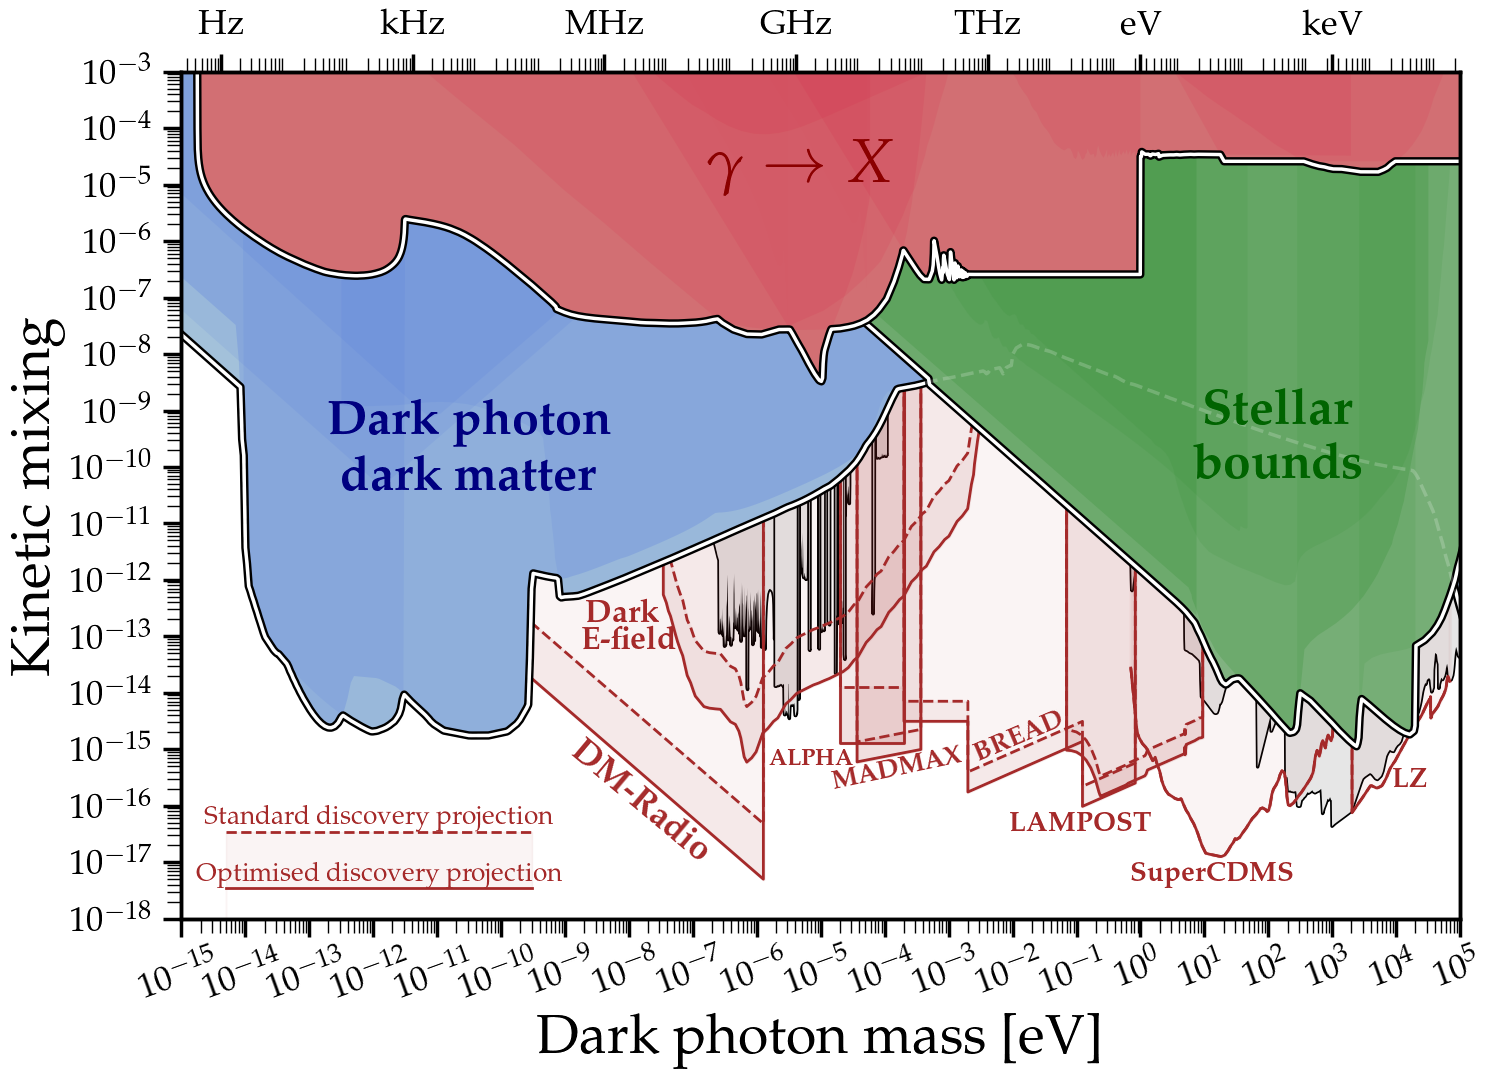

In [3]:
fig,ax = DarkPhoton.FigSetup(m_min=1e-15,chi_max=1e-3)
y2 = 1

pek = line_background(6,'k')

def PlotLimSimple(filename,col,zo,alph,delimiter='\t',rescale_m=False):
    dat = loadtxt("limit_data/DarkPhoton/"+filename+'.txt',delimiter=delimiter)
    if rescale_m:
        dat[:,1] = dat[:,1]/dat[:,0]
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=zo,alpha=alph)
    return

zo = 0.25
alph = 0.1
col = 'crimson'
PlotLimSimple('Cavendish',col,zo,alph)
PlotLimSimple('PlimptonLawton',col,zo,alph)
PlotLimSimple('Spectroscopy',col,zo,alph)
PlotLimSimple('AFM',col,zo,alph)
PlotLimSimple('TEXONO',col,zo,alph)
PlotLimSimple('CROWS',col,zo,alph)
PlotLimSimple('LSW_UWA',col,zo,0.01)
PlotLimSimple('LSW_ADMX',col,zo,0.01)
PlotLimSimple('ALPS',col,zo,alph)
PlotLimSimple('Jupiter',col,zo,alph)
PlotLimSimple('Earth',col,zo,alph)
PlotLimSimple('Crab',col,zo,alph)
PlotLimSimple('SPring-8',col,zo,alph)
PlotLimSimple('COBEFIRAS',col,zo,alph,delimiter=',')

zo = 0.15
alph = 0.1
col = 'ForestGreen'
PlotLimSimple('Solar',col,zo,0.2)
PlotLimSimple('Solar-Global',col,zo,0.2,rescale_m=True)
PlotLimSimple('RG',col,zo,0.1)
PlotLimSimple('HB',col,zo,0.1)
PlotLimSimple('CAST',col,zo,0.1)
PlotLimSimple('SHIPS',col,zo,0.1,rescale_m=True)


zo = 0.01
alph = 0.1
col = 'royalblue'
PlotLimSimple('Cosmology_Witte_inhomogeneous',col,zo,0.2)
PlotLimSimple('Cosmology_Caputo_HeII',col,zo,alph,delimiter=',')
PlotLimSimple('Cosmology_Arias',col,zo,alph)
PlotLimSimple('LeoT',col,zo,alph)
PlotLimSimple('IGM',col,zo,alph)

dat = loadtxt('limit_data/DarkPhoton/DP_Combined_Stellar.txt')
plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=0.16,lw=2.5,path_effects=pek)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('darkgreen',0.5),zorder=0.11)

dat = loadtxt('limit_data/DarkPhoton/DP_Combined_Laboratory.txt')
plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=0.26,lw=2.5,path_effects=pek)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('firebrick',0.6),zorder=0.2)

dat = loadtxt('limit_data/DarkPhoton/DM_combined.txt')
zo =0.3
plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=0.05,lw=2.5,path_effects=pek)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('steelblue',0.5),zorder=0)
plt.plot(dat[:,0],dat[:,1],'--',color='w',alpha=0.2,zorder=0.5,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/DP_Combined_DarkMatterSearches.txt')
plt.plot(dat[:,0],dat[:,1],'-',color='k',alpha=1,zorder=-1,lw=2.5)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('k',0.1),zorder=-1)

dat = loadtxt('limit_data/DarkPhoton/DP_Combined_AxionSearchesRescaled.txt')
plt.plot(dat[:,0],dat[:,1],'-',color='k',alpha=1,zorder=-1,lw=2.5)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('k',0.1),zorder=-1)


dat = loadtxt('limit_data/DarkPhoton/Projections/ALPHA.txt')
chi_a = dat[:,1]*sqrt(1/3/0.0036)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/MADMAX.txt')
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/LAMPOST.txt')
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/SuperCDMS.txt')
dat[:,1] = dat[:,1]*sqrt(0.3/0.45)
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/LZ.txt')
dat[:,1] = sqrt(dat[:,1])
dat[:,1] = dat[:,1]*sqrt(0.3/0.45)
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)


dat = loadtxt('limit_data/DarkPhoton/Projections/DMRadio.txt')
dat[:,1] = dat[:,1]/sqrt(1/3) # <--- need to correct for the fact they don't account for the polarisation to begin with
chi_a = dat[:,1]*sqrt(1/3/0.0036)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/DarkEfield.txt')
dat[:,1] = dat[:,1]*sqrt(1.64/5) # convert from 5 sigma CL to 95%
chi_a = dat[:,1]*sqrt(1/3/0.0036)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1,solid_capstyle='round')
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)


dat = loadtxt('limit_data/DarkPhoton/Projections/BREAD.txt')
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1,solid_capstyle='round')
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)

# dat = loadtxt('limit_data/DarkPhoton/Projections/AharonovBohm.txt')
# plt.plot(dat[:,0],dat[:,1],'--',lw=3,color='brown',zorder=-1)
# plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='gold',alpha=0.05,zorder=-1,lw=2.5)

xleg = [5e-15,3e-10]
yleg = [0.35e-17,0.35e-16]
plt.fill_between([xleg[0],xleg[1],xleg[1],xleg[0]],[yleg[0],yleg[0],yleg[1],yleg[1]],color='Brown',alpha=0.05)
plt.plot(xleg,[yleg[1],yleg[1]],'--',lw=2,color='Brown')
plt.plot(xleg,[yleg[0],yleg[0]],'-',lw=2,color='Brown')
plt.text(exp(sum(log(xleg))/2),yleg[1],'Standard discovery projection',color='Brown',fontsize=19,ha='center',va='bottom')
plt.text(exp(sum(log(xleg))/2),yleg[0],'Optimised discovery projection',color='Brown',fontsize=19,ha='center',va='bottom')

plt.gcf().text(0.3,0.55,r'{\bf Dark photon}',color='navy',ha='center',fontsize=35)
plt.gcf().text(0.3,0.5,r'{\bf dark matter}',color='navy',ha='center',fontsize=35)
plt.gcf().text(0.5,0.78,r'$\gamma \rightarrow X$',color='darkred',ha='center',fontsize=45)
plt.gcf().text(0.79,0.56,r'{\bf Stellar}',color='darkgreen',ha='center',fontsize=36)
plt.gcf().text(0.79,0.51,r'{\bf bounds}',color='darkgreen',ha='center',fontsize=36)

plt.gcf().text(0.4,0.21,r'{\bf DM-Radio}',color='Brown',fontsize=25,rotation=-40,rotation_mode='anchor',ha='center')
plt.gcf().text(0.393,0.38,r'{\bf Dark}',color='Brown',fontsize=23,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.397,0.355,r'{\bf E-field}',color='Brown',fontsize=23,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.507,0.25,r'{\bf ALPHA}',color='Brown',fontsize=17,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.56,0.24,r'{\bf MADMAX}',color='Brown',fontsize=19,rotation=12,rotation_mode='anchor',ha='center')
plt.gcf().text(0.635,0.27,r'{\bf BREAD}',color='Brown',fontsize=19,rotation=23,rotation_mode='anchor',ha='center')

plt.gcf().text(0.67,0.19,r'{\bf LAMPOST}',color='Brown',fontsize=20,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.75,0.145,r'{\bf SuperCDMS}',color='Brown',fontsize=20,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.87,0.23,r'{\bf LZ}',color='Brown',fontsize=20,rotation=0,rotation_mode='anchor',ha='center')


#plt.fill_between([6.5e-15,2.9e-11],[1e-18,1e-18],y2=1,color='gray',edgecolor='none',zorder=-100,alpha=0.05)


MySaveFig(fig,'DarkPhoton_with_Projections')

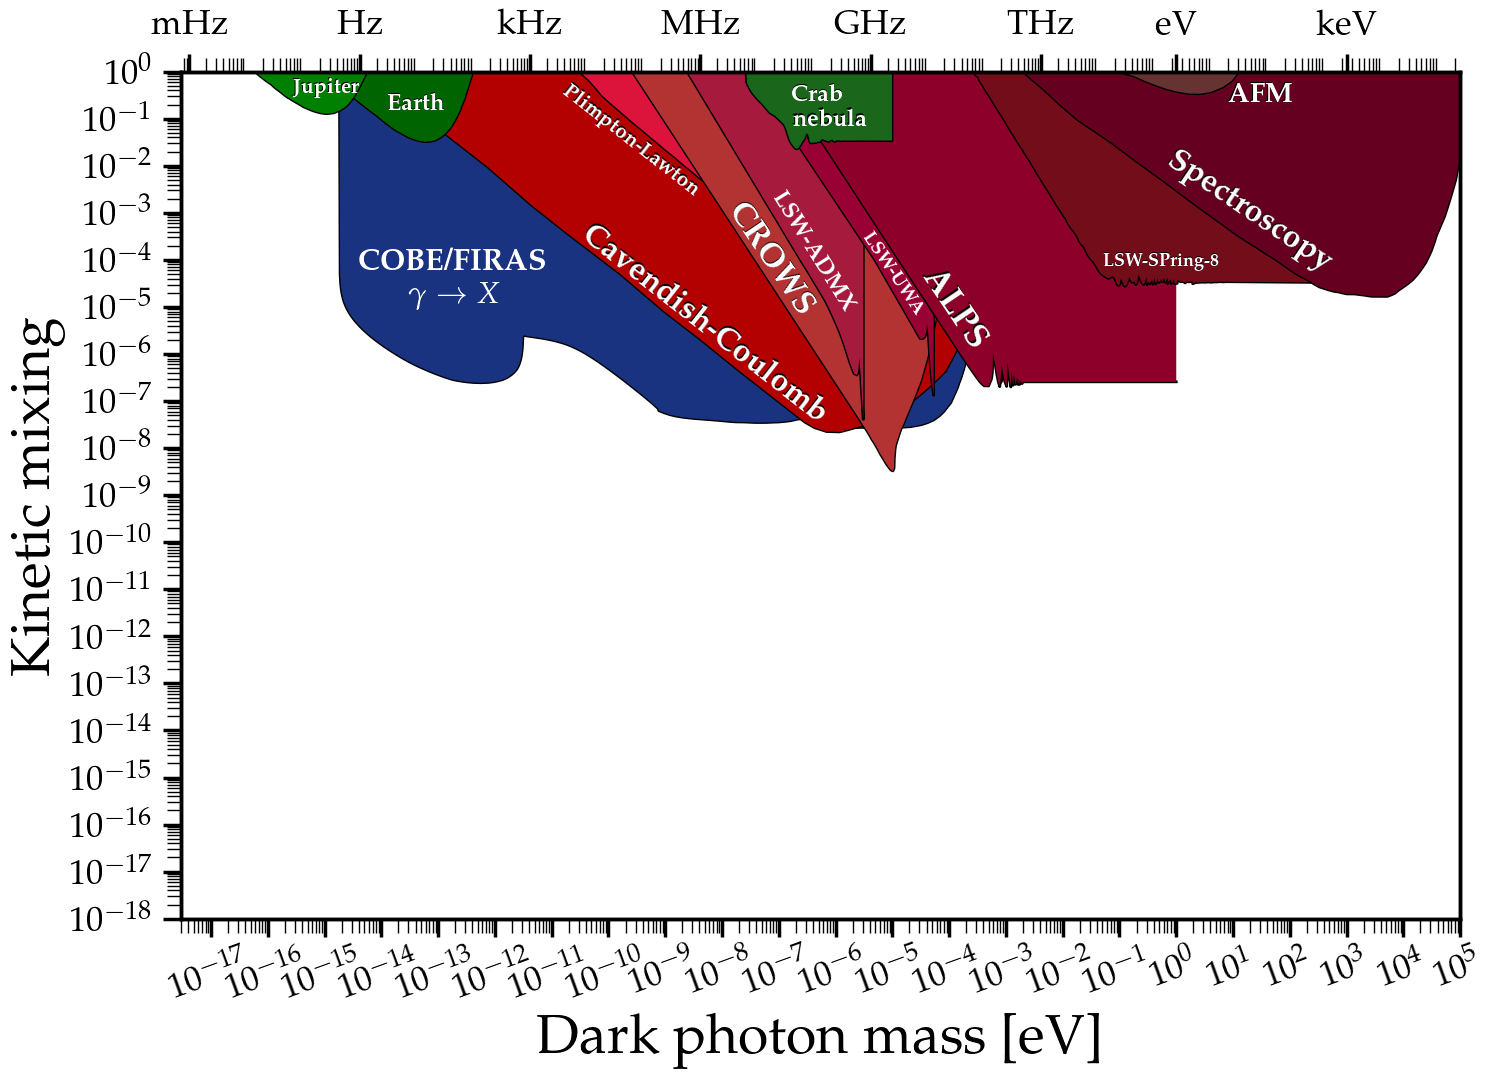

In [4]:
fig,ax = DarkPhoton.FigSetup()
DarkPhoton.LSW(ax)
DarkPhoton.Coulomb(ax)
DarkPhoton.COBEFIRAS(ax)
DarkPhoton.Jupiter(ax)
DarkPhoton.Earth(ax)
DarkPhoton.Crab(ax)
MySaveFig(fig,'DarkPhoton_JustPhotonSearches')

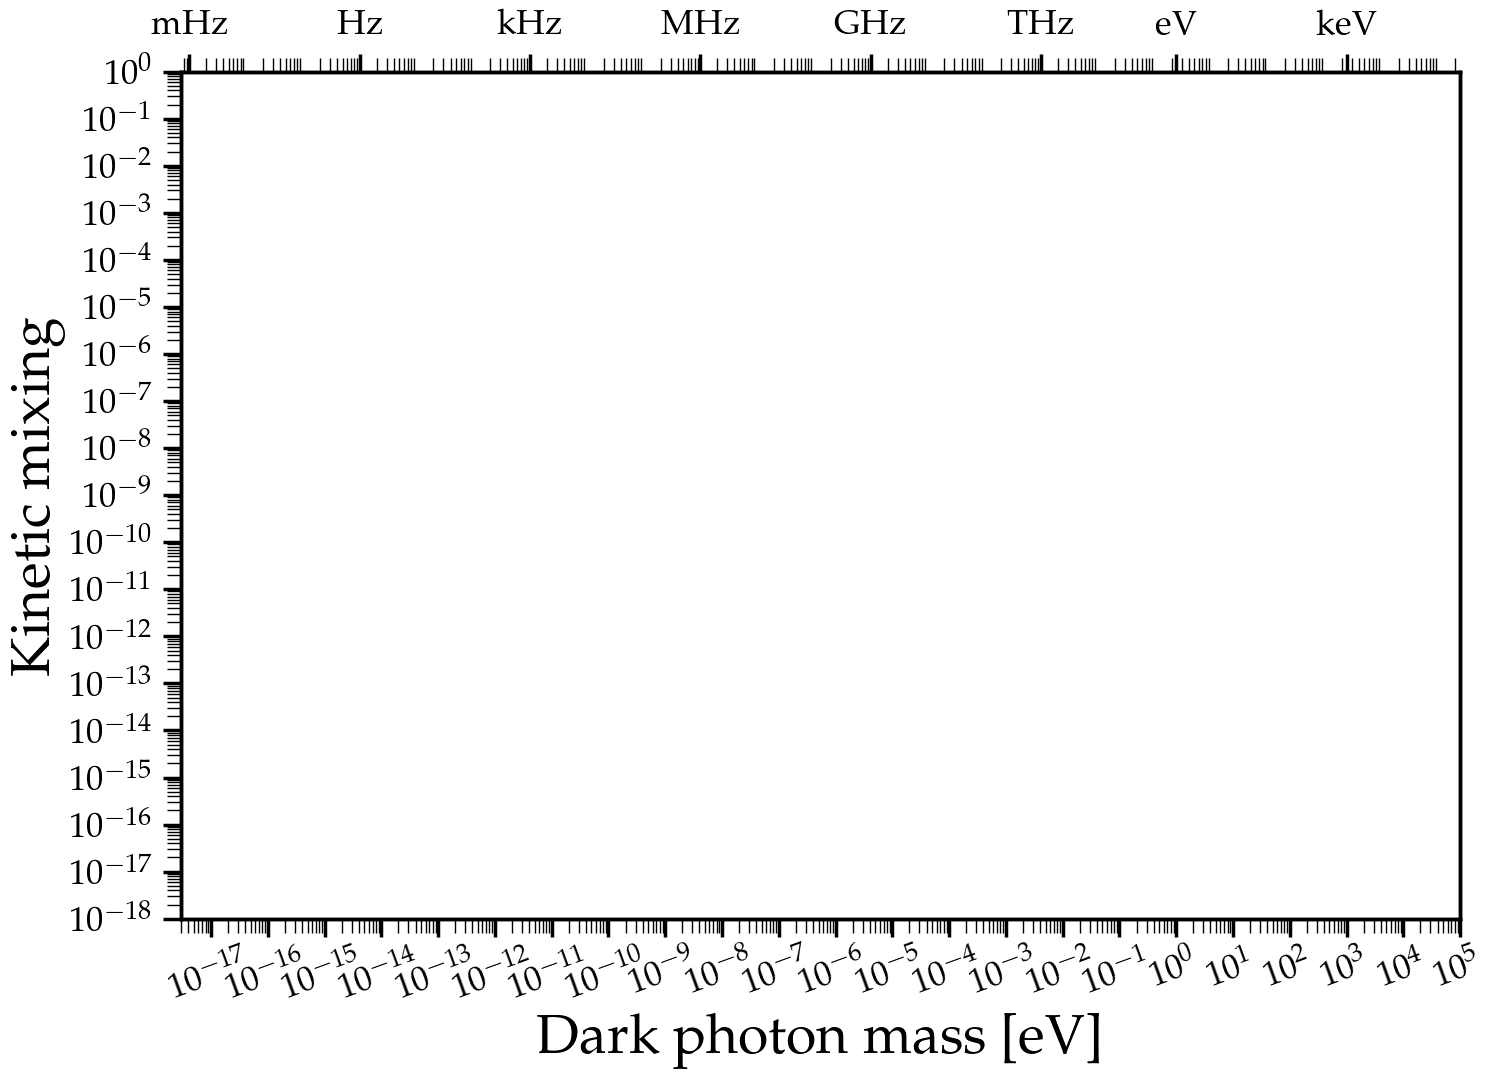

In [5]:
fig,ax = DarkPhoton.FigSetup()

MySaveFig(fig,'DarkPhoton_blank')

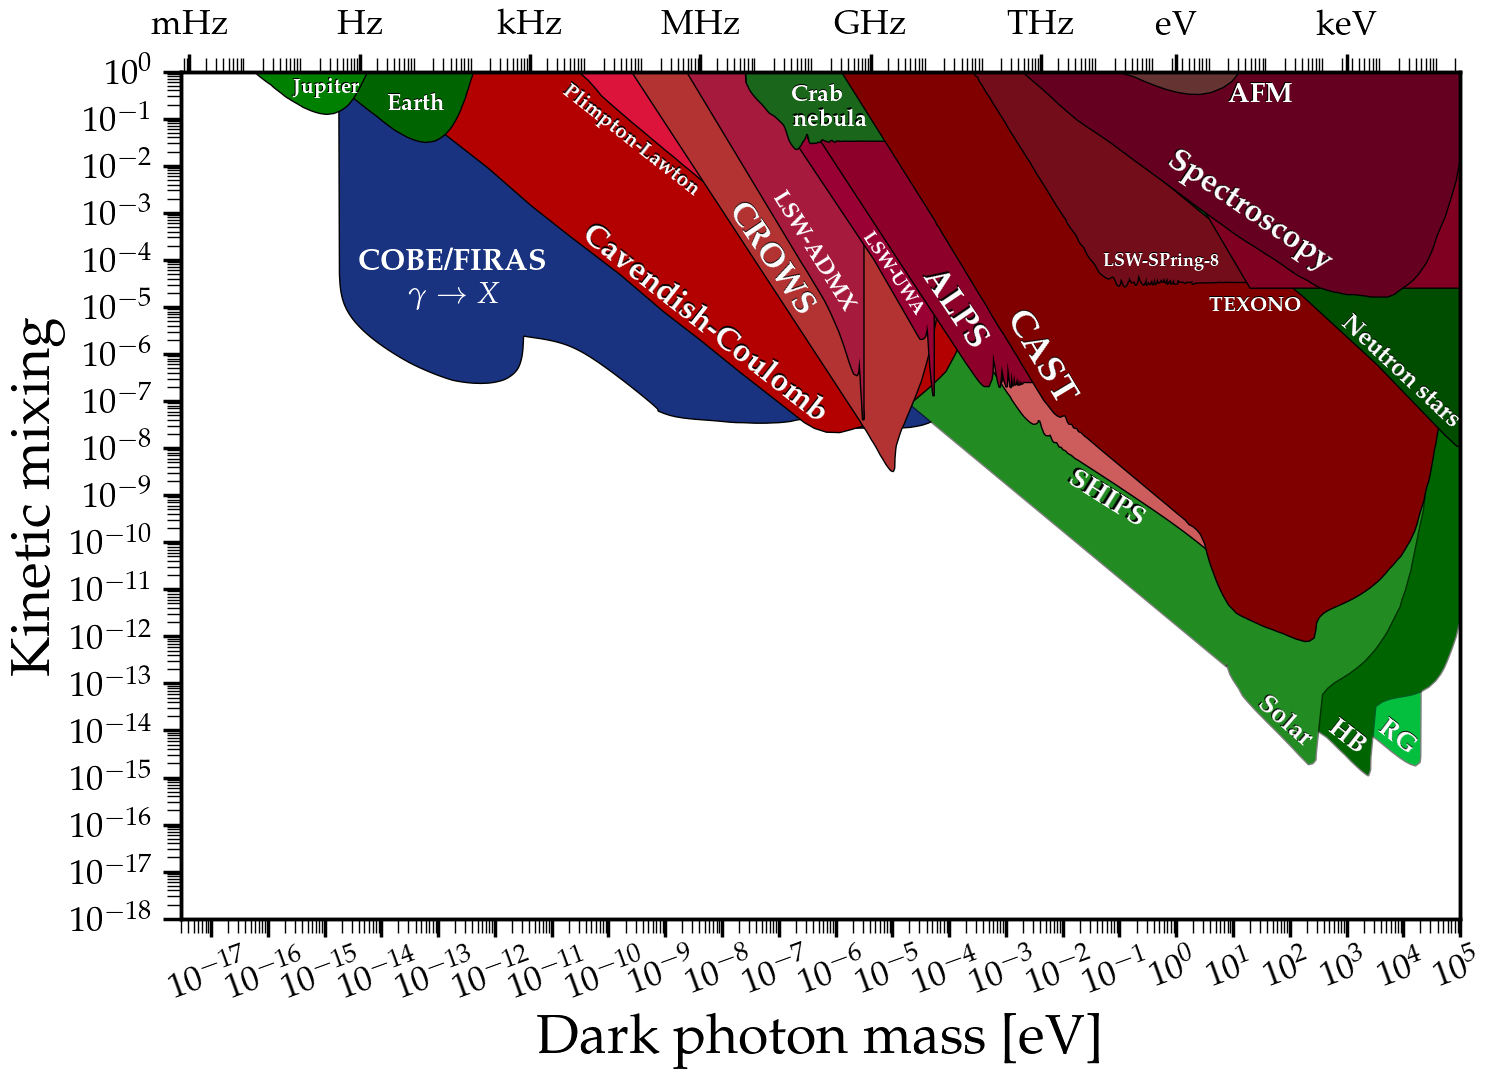

In [6]:
fig,ax = DarkPhoton.FigSetup()
DarkPhoton.LSW(ax)
DarkPhoton.CAST(ax)
DarkPhoton.SHIPS(ax)
DarkPhoton.Coulomb(ax)
DarkPhoton.TEXONO(ax)
DarkPhoton.StellarBounds(ax)
DarkPhoton.COBEFIRAS(ax)
DarkPhoton.Jupiter(ax)
DarkPhoton.Earth(ax)
DarkPhoton.Crab(ax)
DarkPhoton.NeutronStarCooling(ax)
MySaveFig(fig,'DarkPhoton_PhotonSearches_and_StellarBounds')

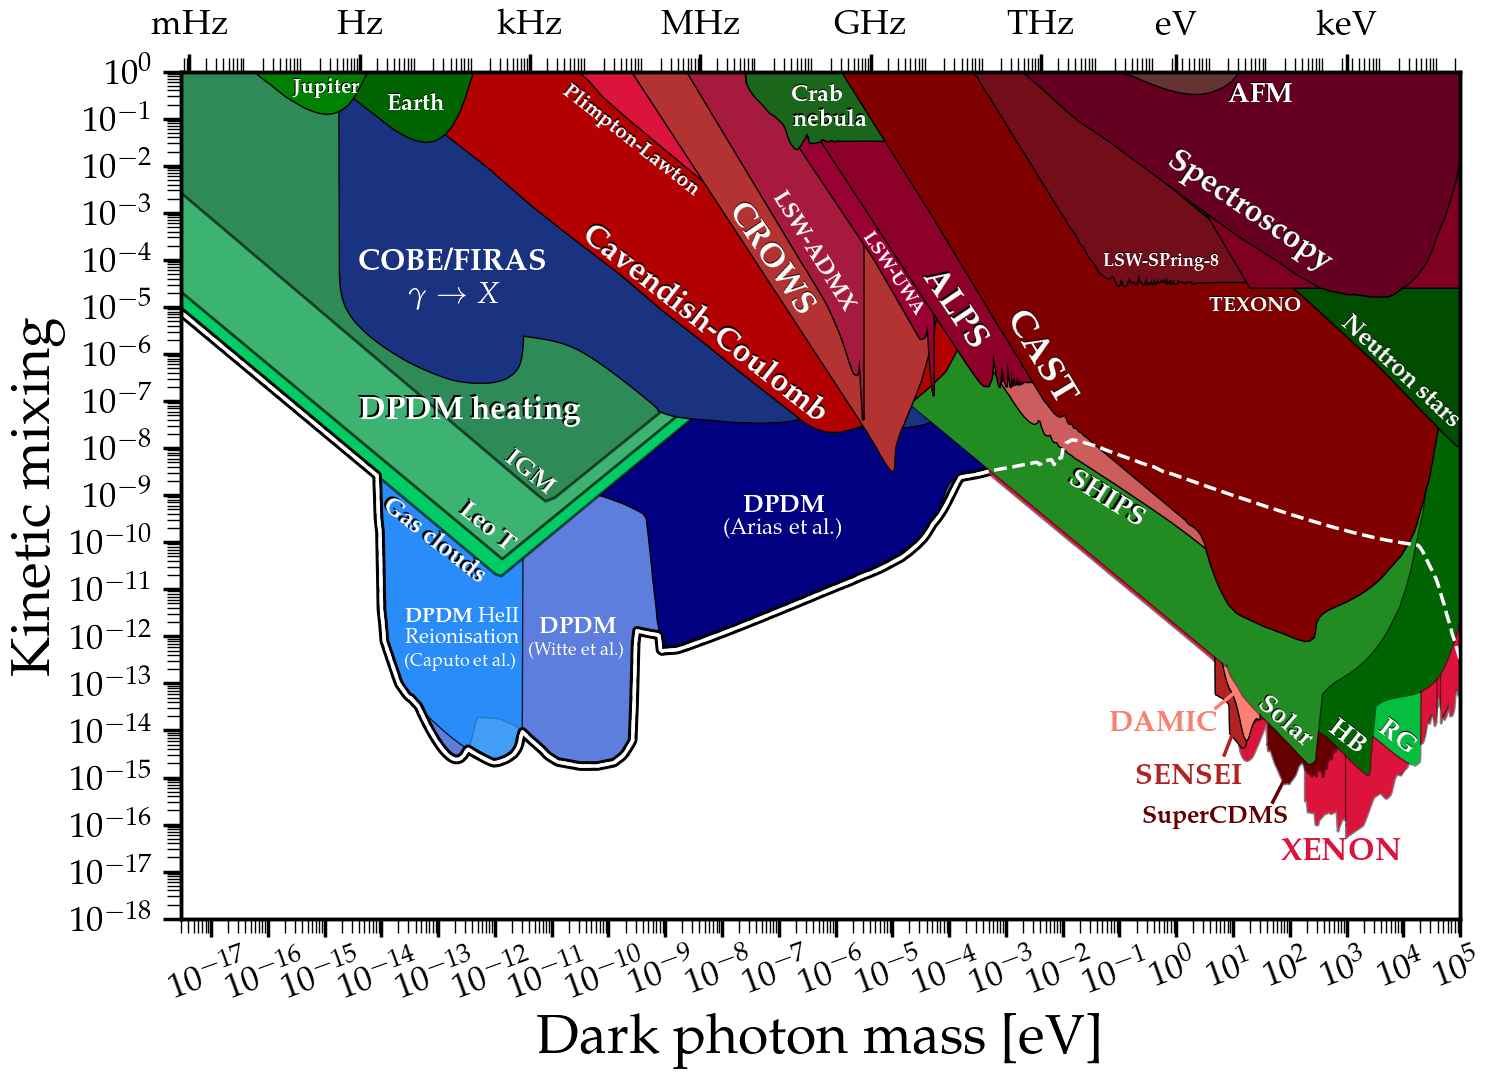

In [7]:
fig,ax = DarkPhoton.FigSetup()
DarkPhoton.DarkMatter(ax)
DarkPhoton.LSW(ax)
DarkPhoton.CAST(ax)
DarkPhoton.SHIPS(ax)
DarkPhoton.Coulomb(ax)
DarkPhoton.TEXONO(ax)
DarkPhoton.Xenon(ax)
DarkPhoton.DAMIC(ax)
DarkPhoton.SENSEI(ax)
DarkPhoton.SuperCDMS(ax)
DarkPhoton.StellarBounds(ax)
DarkPhoton.COBEFIRAS(ax)
DarkPhoton.Jupiter(ax)
DarkPhoton.Earth(ax)
DarkPhoton.Crab(ax)
DarkPhoton.IGM(ax)
DarkPhoton.LeoT(ax)
DarkPhoton.GasClouds(ax)
DarkPhoton.NeutronStarCooling(ax)
MySaveFig(fig,'DarkPhoton_Semicomplete')

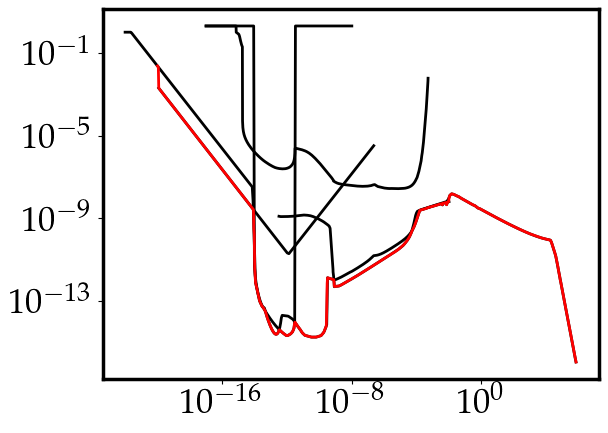

In [8]:
dat1 = loadtxt("limit_data/DarkPhoton/GasClouds.txt")
dat2 = loadtxt("limit_data/DarkPhoton/Cosmology_Witte_inhomogeneous.txt")
dat3 = loadtxt("limit_data/DarkPhoton/COBEFIRAS.txt",delimiter=',')
dat4 = loadtxt("limit_data/DarkPhoton/Cosmology_Caputo_HeII.txt",delimiter=',')
dat5 = loadtxt("limit_data/DarkPhoton/Cosmology_Arias.txt")

plt.plot(dat1[:,0],dat1[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat2[:,0],dat2[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat3[:,0],dat3[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat4[:,0],dat4[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat5[:,0],dat5[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-20
mmax = 698203.561630161
mvals = logspace(log10(mmin),log10(mmax),1000)

chi1 = 10**interp(log10(mvals),log10(dat1[:,0]),log10(dat1[:,1]))
chi1[mvals<dat1[0,0]] = inf
chi1[mvals>dat1[-1,0]] = inf

chi2 = interp(mvals,dat2[:,0],dat2[:,1])
chi2[mvals<dat2[0,0]] = inf
chi2[mvals>dat2[-1,0]] = inf

chi3 = interp(mvals,dat3[:,0],dat3[:,1])
chi3[mvals<dat3[0,0]] = inf
chi3[mvals>dat3[-1,0]] = inf

chi4 = interp(mvals,dat4[:,0],dat4[:,1])
chi4[mvals<dat4[0,0]] = inf
chi4[mvals>dat4[-1,0]] = inf

chi5 = interp(mvals,dat5[:,0],dat5[:,1])
chi5[mvals<dat5[0,0]] = inf
chi5[mvals>dat5[-1,0]] = inf

chi = amin(column_stack((chi1,chi2,chi3,chi4,chi5)),1)

plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DM_combined.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


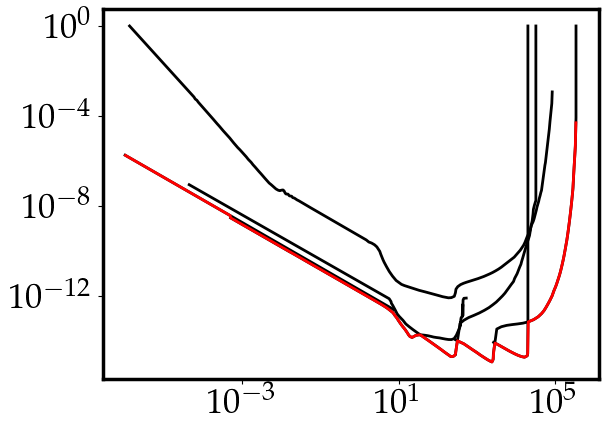

In [9]:
dat1 = loadtxt("limit_data/DarkPhoton/Solar.txt")
dat2 = loadtxt("limit_data/DarkPhoton/RG.txt")
dat3 = loadtxt("limit_data/DarkPhoton/HB.txt")
dat4 = loadtxt("limit_data/DarkPhoton/CAST.txt")
dat5 = loadtxt("limit_data/DarkPhoton/Solar-Global.txt")
dat6 = loadtxt("limit_data/DarkPhoton/XENON1T_Solar_S2.txt")

dat5[:,1] = dat5[:,1]/dat5[:,0]


dats = [dat1,dat2,dat3,dat4,dat5,dat6]
for dat in dats:
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-9
mmax = 1e7
mvals = logspace(log10(mmin),log10(mmax),1000)

chi = zeros(shape=1000)
for dat in dats:
    chi1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    chi1[mvals<amin(dat[:,0])] = inf
    chi1[mvals>amax(dat[:,0])] = inf
    chi = column_stack((chi,chi1))
chi = chi[:,1:]

chi = amin(chi,1)

plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DP_Combined_Stellar.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


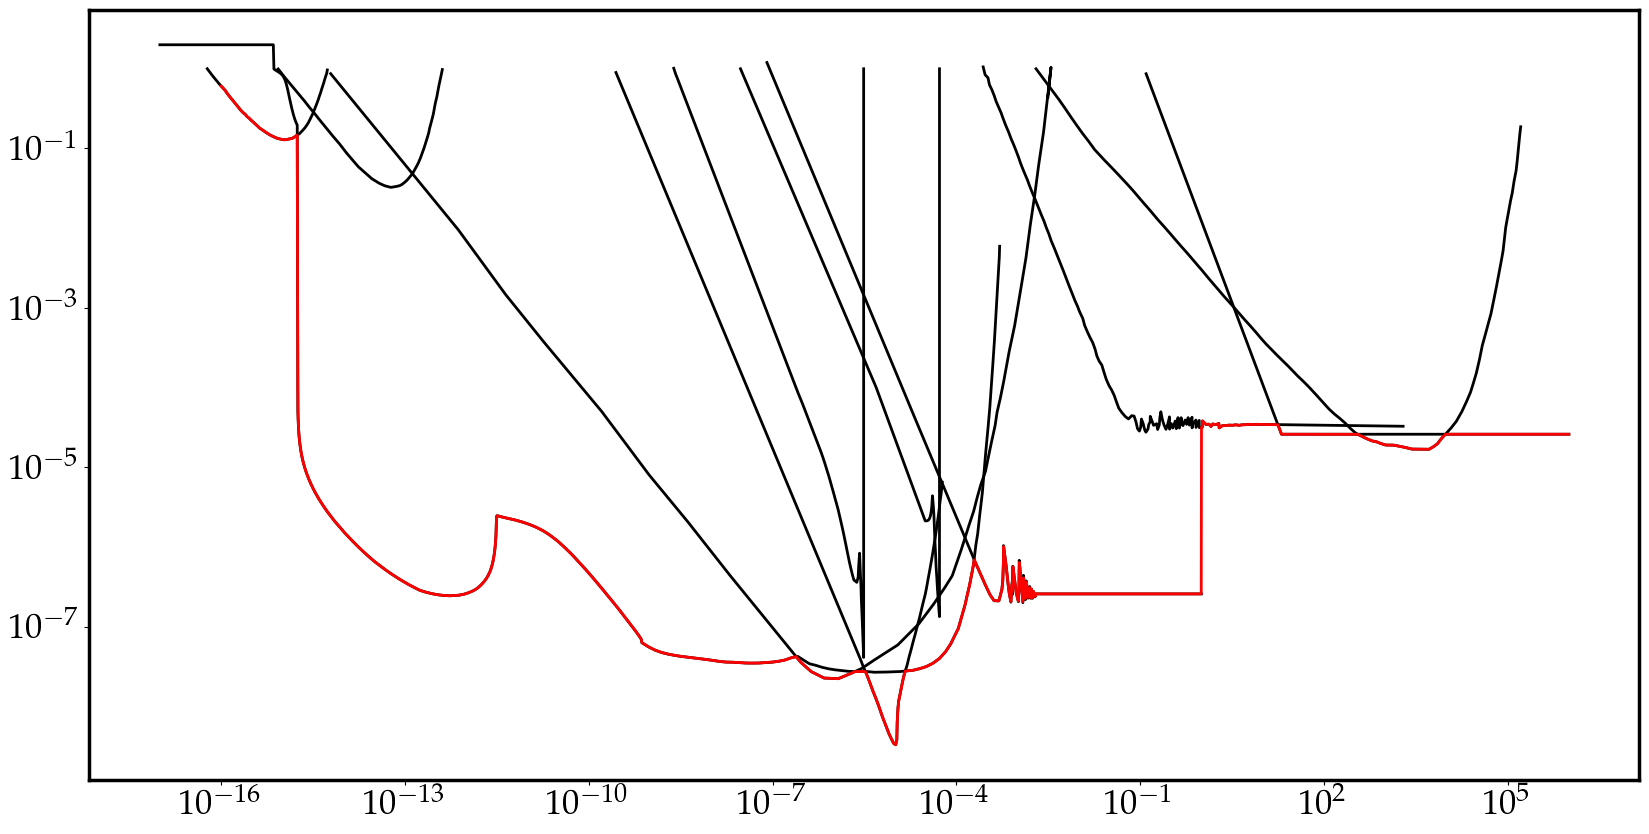

In [10]:
plt.figure(figsize=(20,10))
dat1 = loadtxt("limit_data/DarkPhoton/Cavendish.txt")
dat2 = loadtxt("limit_data/DarkPhoton/Jupiter.txt")
dat3 = loadtxt("limit_data/DarkPhoton/Earth.txt")
dat4 = loadtxt("limit_data/DarkPhoton/TEXONO.txt")
dat5 = loadtxt("limit_data/DarkPhoton/ALPS.txt")
dat6 = loadtxt("limit_data/DarkPhoton/Spectroscopy.txt")
dat7 = loadtxt("limit_data/DarkPhoton/CROWS.txt")
dat8 = loadtxt("limit_data/DarkPhoton/LSW_UWA.txt")
dat9 = loadtxt("limit_data/DarkPhoton/LSW_ADMX.txt")
dat10 = loadtxt("limit_data/DarkPhoton/COBEFIRAS.txt",delimiter=',')
dat11 = loadtxt("limit_data/DarkPhoton/SPring-8.txt")


dats = [dat1,dat2,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10,dat11]
for dat in dats:
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-16
mmax = 1e7
mvals = logspace(log10(mmin),log10(mmax),5000)

chi = zeros(shape=5000)
for dat in dats:
    chi1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    chi1[mvals<amin(dat[:,0])] = inf
    chi1[mvals>amax(dat[:,0])] = inf
    chi = column_stack((chi,chi1))
chi = chi[:,1:]

chi = amin(chi,1)

plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DP_Combined_Laboratory.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


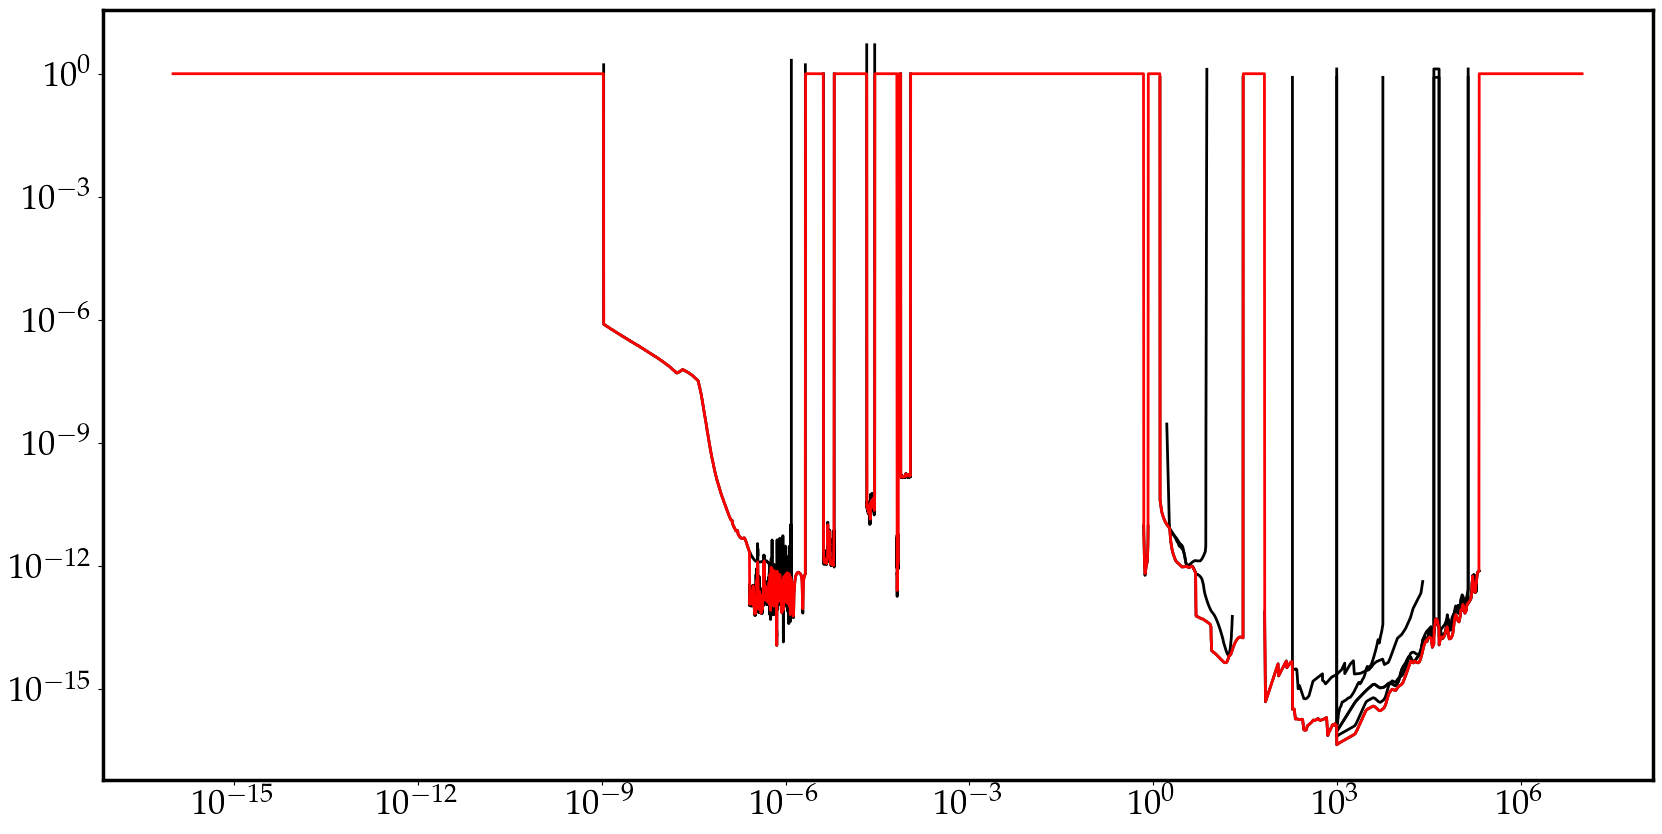

In [11]:
plt.figure(figsize=(20,10))
dat1 = loadtxt("limit_data/DarkPhoton/DAMIC.txt")
dat1[:,1] = dat1[:,1]*sqrt(0.3/0.45)

dat2 = loadtxt("limit_data/DarkPhoton/FUNK.txt")
dat2[:,1] = dat2[:,1]*sqrt(0.3/0.45)*sqrt(2/3/0.27)


dat3 = loadtxt("limit_data/DarkPhoton/SENSEI.txt")
dat3[:,1] = dat3[:,1]*sqrt(0.3/0.45)

dat4 = loadtxt("limit_data/DarkPhoton/WISPDMX.txt")
dat4[:,1] = dat4[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.081)

dat5 = loadtxt("limit_data/DarkPhoton/DarkEField.txt")
dat5[:,1] = dat5[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.049)

dat6 = loadtxt("limit_data/DarkPhoton/XENON1T.txt")
dat6[:,0] = dat6[:,0]*1e3
dat6[:,1] = dat6[:,1]*sqrt(0.3/0.45)

dat7 = loadtxt("limit_data/DarkPhoton/XENON1T_S1S2.txt")
dat7[:,1] = dat7[:,1]*sqrt(0.3/0.45)

dat8 = loadtxt("limit_data/DarkPhoton/XENON100.txt")
dat8[:,1] = dat8[:,1]*sqrt(0.3/0.45)


dat9 = loadtxt("limit_data/DarkPhoton/SHUKET.txt")
dat9[:,1] = dat9[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.0086)

dat10 = loadtxt("limit_data/DarkPhoton/SQuAD.txt")
dat10[:,1] = dat10[:,1]*sqrt(0.4/0.45)*sqrt(1/3/0.0025)

dat11 = loadtxt("limit_data/DarkPhoton/XENON1T_S1S2.txt")
dat11[:,1] = dat11[:,1]*sqrt(0.3/0.45)

dat12 = loadtxt("limit_data/DarkPhoton/LAMPOST.txt")
dat12[:,1] = dat12[:,1]*sqrt(0.4/0.45)

dat13 = loadtxt("limit_data/DarkPhoton/ORPHEUS.txt")
dat13[:,1] = dat13[:,1]*sqrt(1/3/0.0025)

dat14 = flipud(loadtxt("limit_data/DarkPhoton/DOSUE-RR.txt"))

dat15 = loadtxt("limit_data/DarkPhoton/FAST.txt")

dat16 = loadtxt("limit_data/DarkPhoton/XENONnT.txt")
dat16[:,1] = dat16[:,1]*sqrt(0.3/0.45)

dat17 = loadtxt("limit_data/DarkPhoton/XENONnT.txt")
dat17[:,1] = dat17[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.13)



dats = [dat1,dat2,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10,dat11,dat12,dat13,dat14,dat15,dat16,dat17]
for dat in dats:
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-16
mmax = 1e7

mvals = logspace(log10(mmin),log10(mmax),5000)

chi = zeros(shape=5000)
for dat in dats:
    chi1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    chi1[mvals<amin(dat[:,0])] = inf
    chi1[mvals>amax(dat[:,0])] = inf
    chi = column_stack((chi,chi1))
chi = chi[:,1:]

chi = amin(chi,1)

chi[chi==inf] = 1
plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DP_Combined_DarkMatterSearches.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


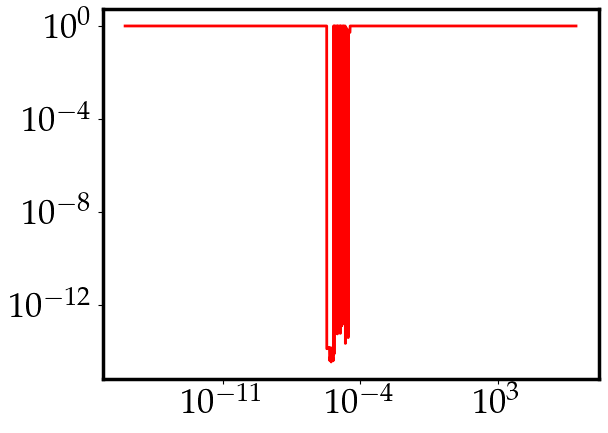

In [12]:
fnames = ['ADMX','ADMX2018','ADMX2019_1','ADMX2019_2','ADMX2021','ADMX_Sidecar','HAYSTAC','HAYSTAC_2020','CAPP-1',
         'CAPP-2','CAPP-3','CAPP-4','CAPP-5','CAPP-6','CAST-CAPP','TASEH']

mmin = 1e-16
mmax = 1e7
mvals = logspace(log10(mmin),log10(mmax),5000)

chi = zeros(shape=5000)
for fname in fnames:
    dat = loadtxt("limit_data/DarkPhoton/Rescaled/"+fname+".txt")
    chi1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    chi1[mvals<amin(dat[:,0])] = inf
    chi1[mvals>amax(dat[:,0])] = inf
    chi = column_stack((chi,chi1))
chi = chi[:,1:]

chi = amin(chi,1)

chi[chi==inf] = 1
plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DP_Combined_AxionSearchesRescaled.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')